In [1]:
%matplotlib inline
import tensorflow as tf
from matplotlib import pyplot as plt
from IPython import display

In [2]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

def use_svg_display():
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

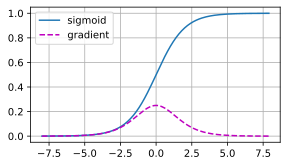

In [3]:
x = tf.Variable(tf.range(-8.0, 8.0, 0.1))
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
plot(x.numpy(), [y.numpy(), t.gradient(y, x).numpy()], 
    legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [4]:
m = tf.random.normal((4, 4))
print('一个矩阵\n', m)
for i in range(100):
    m = tf.matmul(m, tf.random.normal((4, 4)))
    
print('乘以100个矩阵后\n', m.numpy())

一个矩阵
 tf.Tensor(
[[-0.6447507   1.0374542   1.9419308   0.40644804]
 [ 1.1194745   0.92145175 -1.8495494  -0.8853105 ]
 [ 1.7535292  -0.9367506   0.81378174 -1.6931142 ]
 [ 0.99966383 -1.4981053   0.4966576   1.2169142 ]], shape=(4, 4), dtype=float32)
乘以100个矩阵后
 [[-6.0906755e+26  5.0390321e+26 -1.0984216e+26  8.9784627e+26]
 [-4.4394796e+24  3.6697304e+24 -7.9962903e+23  6.5444713e+24]
 [ 3.9254660e+26 -3.2460348e+26  7.0729908e+25 -5.7865175e+26]
 [-1.0383346e+27  8.5960890e+26 -1.8766065e+26  1.5313160e+27]]
